In [1]:
#  Import custom HMM, GMM from models.py
import numpy as np
import matplotlib.pyplot as plt
from models import HMM_model, GMM_model
from IPython.display import Math, display

In [2]:
#  set seed for reproducibility
np.random.seed(2017)

In [3]:
#  Parameters
FILES = ['EMGaussian.train', 'EMGaussian.test']
COLOR = ['red', 'blue', 'green', 'orange']
CLUSTER_MEANS_COLOR = ['pink', 'cyan', 'green', 'yellow']

train_data = np.loadtxt('hwk4data/' + FILES[0])
test_data = np.loadtxt('hwk4data/' + FILES[1])

pi = np.array([1/4, 1/4, 1/4, 1/4])
A = np.array([[1/2, 1/6, 1/6, 1/6],
              [1/6, 1/2, 1/6, 1/6],
              [1/6, 1/6, 1/2, 1/6],
              [1/6, 1/6, 1/6, 1/2]])
mu = np.array([[-2.0344, 4.1726],
               [3.9779, 3.7735],
               [3.8007, -3.7972],
               [-3.0620, -3.5345]])
cov = np.array([[[2.9044, 0.2066], [0.2066, 2.7562]],
               [[0.2104, 0.2904], [0.2904, 12.2392]],
               [[0.9213, 0.0574], [0.0574, 1.8660]],
               [[6.2414, 6.0502], [6.0502, 6.1825]]])

In [4]:
#  Initialize HMM using params from Q 2.2
hmm = HMM_model(pi_init=pi, A_init=A, mu_init=mu, cov_init=cov)
#  See implementation of compute_smoothing in models.py for Q2.1
smoothing, pair_marginals = hmm.compute_smoothing(test_data)

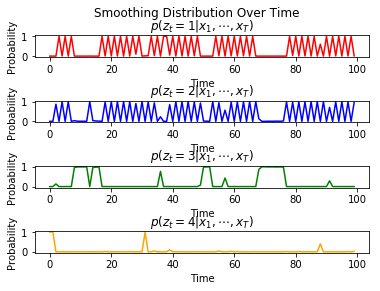

In [5]:
#  Plot for Q 2.2
def plot_smoothing(smoothing, lim, title):
    plt.figure().subplots_adjust(wspace=0, hspace=2)
    plt.suptitle('Smoothing Distribution Over Time')
    for j in range(4):
        plt.subplot(4, 1, j+1)
        plt.plot(smoothing[:lim, j], color=COLOR[j])
        plt.xlabel('Time')
        plt.ylabel('Probability')
        plt.title(r'$p(z_t={} |x_1, \cdots, x_T )$'.format(j+1))

    #plt.savefig('../{}'.format(title))
    plt.show()
    
plot_smoothing(smoothing, 100, 'smoothing_dist')

current loss on iter 1: -2299.8909850259206
current loss on iter 2: -1928.1637932988817
current loss on iter 3: -1920.8497045817114
current loss on iter 4: -1919.6988993611517
current loss on iter 5: -1919.4379322114587
current loss on iter 6: -1919.3982621517023
current loss on iter 7: -1919.3951599586312
current loss on iter 8: -1919.3954525573452


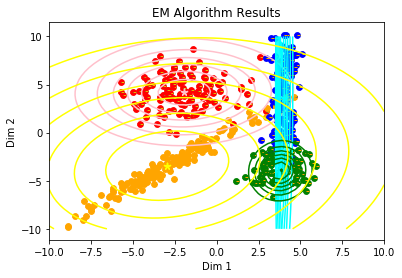

In [6]:
#  See estimate_params in models.py for Q 2.3
train_loss, test_loss = hmm.train_model(max_iter=100, epsilon=1e-3, train_data=train_data, test_data=test_data)

In [7]:
#Parameters learned for Q 2.4
from IPython.display import Markdown as md
np.set_printoptions(precision=2, suppress=True, linewidth=10)
md("$\pi = {}$".format(np.array2string(hmm.pi, separator=', ')))

$\pi = [ 0.,  0.,
  0.,  1.]$

In [8]:
string = ""
for i in range(1, 5):
    string += "$\mu_{0} = {1}$  \n".format(i, np.array2string(hmm.mu[i-1], separator=', '))
md(string)

$\mu_1 = [-1.94,
  4.2 ]$  
$\mu_2 = [ 3.99,
  3.64]$  
$\mu_3 = [ 3.79,
 -3.97]$  
$\mu_4 = [-2.96,
 -3.43]$  


In [9]:
string = ""
for i in range(1, 5):
    string += "$\Sigma_{0} = {1}$  \n".format(i, np.array2string(hmm.cov[i-1], separator=', '))
md(string)

$\Sigma_1 = [[ 3.34,
   0.32],
 [ 0.32,
   2.84]]$  
$\Sigma_2 = [[  0.2 ,
    0.28],
 [  0.28,
   12.37]]$  
$\Sigma_3 = [[ 0.95,
   0.08],
 [ 0.08,
   1.58]]$  
$\Sigma_4 = [[ 6.88,
   6.66],
 [ 6.66,
   6.75]]$  


In [10]:
string = ""
for i in range(0, 4):
    string += "${}$  \n".format(np.array2string(hmm.A[i], separator=', '))

md("$A=$  \n{}".format(string))

$A=$  
$[ 0.02,
  0.86,
  0.07,
  0.05]$  
$[ 0.95,
  0.02,
  0.02,
  0.03]$  
$[ 0.03,
  0.03,
  0.87,
  0.02]$  
$[ 0.01,
  0.09,
  0.04,
  0.9 ]$  


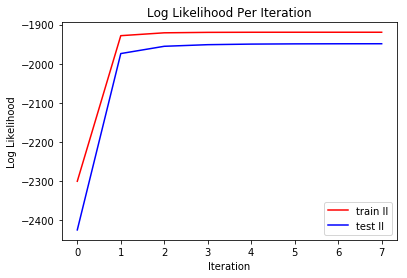

In [11]:
# Log Likelihood plot for Q 2.5
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Per Iteration')
plt.plot(train_loss, color='red', label='train ll')
plt.plot(test_loss, color='blue', label='test ll')
plt.legend(loc='lower right')
#plt.savefig('../ll_Plot'.format())
plt.show()

In [12]:
#  Get LL values for previous models
import pandas as pd
comp = pd.DataFrame(index=['HMM', 'GMM Spherical Cov', 'GMM General Cov'], columns=['Train LL','Test LL'])
comp['Train LL']['HMM'] = train_loss[-1]
comp['Test LL']['HMM'] = test_loss[-1]

# Comparisions in Log Likelihood for Q 2.6
GModel = GMM_model(train_data=train_data, num_clusters=4, struct='full')
losses = GModel.train(train_data, 100, 1e-10)
print('training log likelihood for GMM with full cov: {}'.format(losses[-1]*500))
_, test_loss = GModel.compute_loss(test_data)
print('test log likelihood for GMM with full cov: {}'.format(test_loss*500))
#GModel.plot_means(train_data, name='EM_general_img', title='EM With General Covariance')

comp['Train LL']['GMM General Cov'] = losses[-1]*500
comp['Test LL']['GMM General Cov'] = test_loss*500

GModel = GMM_model(train_data=train_data, num_clusters=4, struct='sphere')
losses = GModel.train(train_data, 100, 1e-10)
print('training log likelihood for GMM with spherical cov: {}'.format(losses[-1]*500))
_, test_loss = GModel.compute_loss(test_data)
print('test log likelihood for GMM with spherical cov: {}'.format(test_loss*500))

comp['Train LL']['GMM Spherical Cov'] = losses[-1]*500
comp['Test LL']['GMM Spherical Cov'] = test_loss*500

current mean square deviation at iter 0: 7.576991913310991
current mean square deviation at iter 1: 6.775927076765881
current mean square deviation at iter 2: 6.5528839168506305
current mean square deviation at iter 3: 6.4999329664068375
current mean square deviation at iter 4: 6.488493329167502
current mean square deviation at iter 5: 6.48052717825385
current mean square deviation at iter 6: 6.477248331949982
current mean square deviation at iter 7: 6.475559192992271
current mean square deviation at iter 8: 6.475559192992271
log likelihood for iteration 0: -5.981563884966866
log likelihood for iteration 1: -5.343993996303375
log likelihood for iteration 2: -5.0283881393382766
log likelihood for iteration 3: -4.852017545953801
log likelihood for iteration 4: -4.782046488471198
log likelihood for iteration 5: -4.760778007148252
log likelihood for iteration 6: -4.7505817977509865
log likelihood for iteration 7: -4.743783722846611
log likelihood for iteration 8: -4.739184105009819
log lik

In [13]:
#  Print table for Q 2.6
print(comp)

                  Train LL  Test LL
HMM                -1919.4 -1948.75
GMM Spherical Cov -2722.31 -2769.27
GMM General Cov   -2367.18 -2450.37


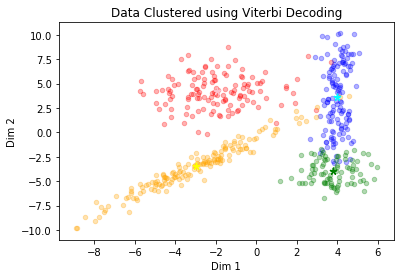

In [14]:
#  Q 2.8
prob, _ = hmm.vertibi_decoding(train_data, showplot=True)

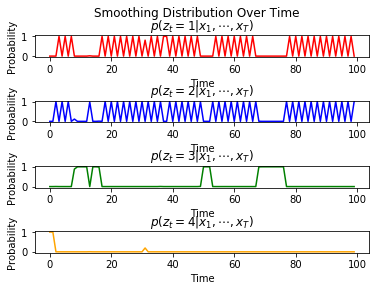

In [15]:
#  Plot for Q 2.9
smoothing, _ = hmm.compute_smoothing(test_data)
plot_smoothing(smoothing, 100, 'smoothing_dist_EM')

_, path = hmm.vertibi_decoding(test_data, showplot=False)

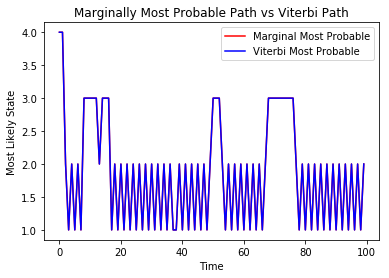

In [16]:
#  Plot for Q10 and Q11
plt.figure()
plt.title('Marginally Most Probable Path vs Viterbi Path')
plt.plot((np.argmax(smoothing, axis=1)+1)[:100], color='red', label='Marginal Most Probable')
plt.plot((path+1)[:100], color='blue', label='Viterbi Most Probable')
plt.xlabel('Time')
plt.ylabel('Most Likely State')
plt.legend(loc='upper right')
#plt.savefig('../marg_vs_viterbi')
plt.show()